# GROUP 5 - FBPROPHET
---
- Nguyễn Nhất Thưởng - 20522000
- Lê Quang Hòa - 20521331
- Kiều Xuân Diệu Hương - 20521381
---
Tóm tắt Train tốt nhất (90% train - 10% tesst):
- Data: 5289 dòng, 4760 dòng đầu tiên dùng để train, 528 dòng cuối dùng để test

Kết quả:

- Biểu đồ:
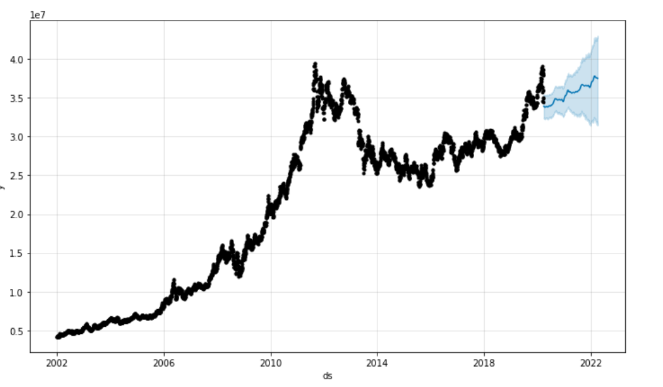
- Dự đoán 30 ngày tiếp theo:

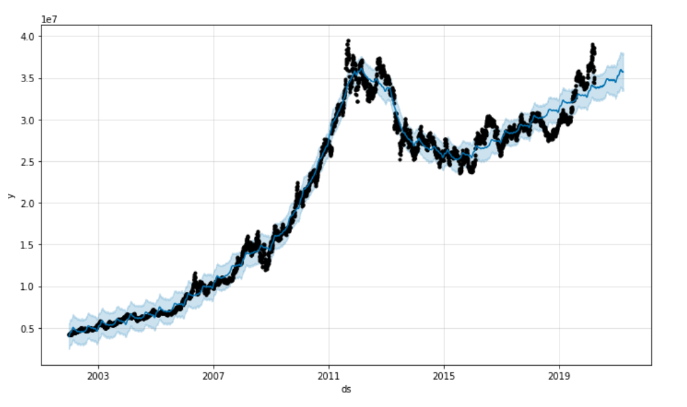
----
# KẾT LUẬN
-----
Dữ liệu 2002-2022

- Sau khi chia trường hợp train và test thì chúng em nhật thấy dữ liệu Predict( có dữ liệu thực tế) chính xác hơn dữ liệu Predict( không có dữ liệu thực tế)

- Dữ liệu càng được train nhiều thì dự đoán càng được chính xác





# Import libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
#import libraries
import itertools
from fbprophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
#get the data
df=pd.read_csv('/content/drive/MyDrive/Team5-PAPERREPORT/Data/DATA(2002-2022).csv')
df

,Date,Prices
0,2002-01-01,4170449.50
1,2002-01-02,4198629.19
2,2002-01-03,4206113.25
3,2002-01-04,4190692.00
4,2002-01-07,4203514.59
...,...,...
5284,2022-04-04,44102530.37
5285,2022-04-05,44470144.87
5286,2022-04-06,44137702.89
5287,2022-04-07,44176594.17


## Data Information


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5289 non-null   object 
 1   Prices  5289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.8+ KB


#Data Transformation

In [ ]:
#Date variable
df.Date = pd.to_datetime(df.Date,
                                format = "%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5289 non-null   datetime64[ns]
 1   Prices  5289 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.8 KB


In [ ]:
#renaming variable
df = df.rename(columns = {'Prices' : 'y'})
df = df.rename(columns = {'Date' : 'ds'})
df

,ds,y
0,2002-01-01,4170449.50
1,2002-01-02,4198629.19
2,2002-01-03,4206113.25
3,2002-01-04,4190692.00
4,2002-01-07,4203514.59
...,...,...
5284,2022-04-04,44102530.37
5285,2022-04-05,44470144.87
5286,2022-04-06,44137702.89
5287,2022-04-07,44176594.17


## Train / Test Split

---
- Data is splited into 5259 training days and 30 days for testing. So the first 5259 days is training data and the next 30 following days is testing data
---

In [ ]:
#Training and test set
test_days = 528
training_set = df.iloc[:-test_days, :]
test_set = df.iloc[-test_days:, :]
training_set.tail(5)

,ds,y
5224,2022-01-10,40737309.89
5225,2022-01-11,41015264.51
5226,2022-01-12,41346688.48
5227,2022-01-13,41309204.77
5228,2022-01-14,41408308.14


##Create Model
---

In [ ]:
#Facebook Prophet model
m = Prophet(daily_seasonality=True)
m.fit(training_set)
forecast = m.predict(test_set)

In [ ]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2022-04-04,4.532693e+07,4.365853e+07,4.756140e+07,4.532410e+07,4.533826e+07,289186.779739,289186.779739,289186.779739,155200.941849,...,8160.078698,8160.078698,8160.078698,125825.759193,125825.759193,125825.759193,0.0,0.0,0.0,4.561611e+07
56,2022-04-05,4.533833e+07,4.378694e+07,4.758064e+07,4.533096e+07,4.534914e+07,295917.132350,295917.132350,295917.132350,155200.941849,...,10522.881511,10522.881511,10522.881511,130193.308991,130193.308991,130193.308991,0.0,0.0,0.0,4.563425e+07
57,2022-04-06,4.534974e+07,4.369096e+07,4.765415e+07,4.534115e+07,4.536170e+07,296107.534277,296107.534277,296107.534277,155200.941849,...,7495.266841,7495.266841,7495.266841,133411.325587,133411.325587,133411.325587,0.0,0.0,0.0,4.564585e+07
58,2022-04-07,4.536115e+07,4.371586e+07,4.756313e+07,4.535098e+07,4.537358e+07,294539.468484,294539.468484,294539.468484,155200.941849,...,3886.100943,3886.100943,3886.100943,135452.425692,135452.425692,135452.425692,0.0,0.0,0.0,4.565569e+07
59,2022-04-08,4.537256e+07,4.384129e+07,4.751123e+07,4.536209e+07,4.538586e+07,300260.751177,300260.751177,300260.751177,155200.941849,...,8735.929870,8735.929870,8735.929870,136323.879458,136323.879458,136323.879458,0.0,0.0,0.0,4.567282e+07


## Model Evaluation

In [ ]:
mae = mean_absolute_error(test_set['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(test_set['y'], forecast['yhat'])

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")


MAE: 2177625.27
MAPE: 5.16%


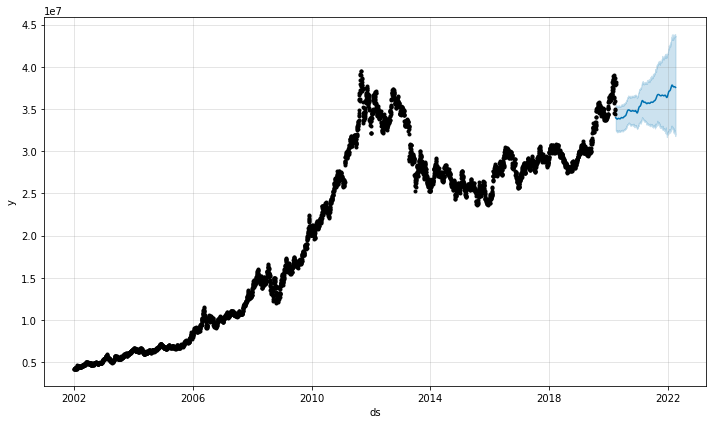

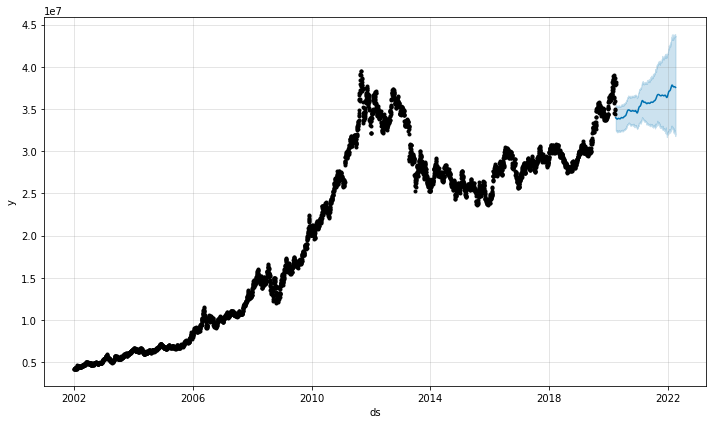

In [ ]:
m.plot(forecast)

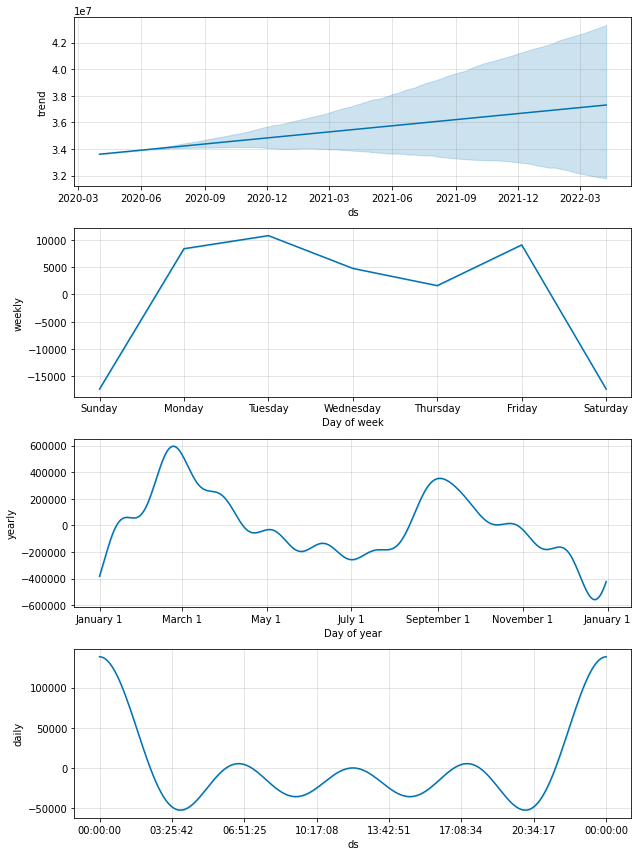

In [ ]:
m.plot_components(forecast);

## Forecasting

In [ ]:
#Create Future Dataframe
future = m.make_future_dataframe(periods = 2250, # Day until 30 days after 8/4/2022
                                 freq = "D")
future

,ds
0,2002-01-01
1,2002-01-02
2,2002-01-03
3,2002-01-04
4,2002-01-07
...,...
7474,2028-03-09
7475,2028-03-10
7476,2028-03-11
7477,2028-03-12


Merge columns

In [ ]:
#merge regressors
future = pd.concat([future, df.iloc[:,1:]],
                   axis = 1)
future

,ds,y
0,2002-01-01,4170449.50
1,2002-01-02,4198629.19
2,2002-01-03,4206113.25
3,2002-01-04,4190692.00
4,2002-01-07,4203514.59
...,...,...
7474,2028-03-09,NaN
7475,2028-03-10,NaN
7476,2028-03-11,NaN
7477,2028-03-12,NaN


Prophet trả về một Dataframe mới với nhiều cột thuộc tính đa dạng hơn. Tuy nhiên, ta cần quan tâm ba thuộc tính chính trong quá trình dự đoán này:

----

- y_hat: giá trị dự báo theo mốc thời gian
- y_hat_lower: giới hạn dưới của giá trị dự báo y_hat
- y_hat_upper: giới hạn trên của giá trị dự báo y_hat

----

In [ ]:
#forecast
forecast = m.predict(future)

Predict data


In [ ]:
#predictions
predictions_prophet = forecast.yhat[-test_days:].rename("prophet")
predictions_prophet[:5]

7419    6.952294e+07
7420    6.952817e+07
7421    6.955947e+07
7422    6.961624e+07
7423    6.964575e+07
Name: prophet, dtype: float64

Data Visualization
---

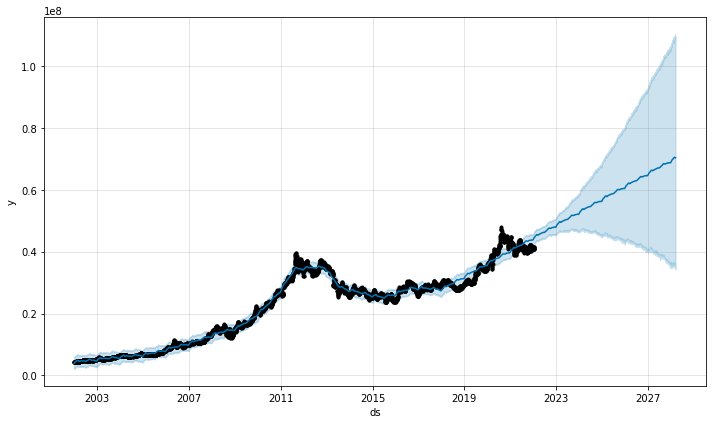

In [ ]:
#visualization forecast
m.plot(forecast);

In [ ]:
from fbprophet.plot import plot_plotly
plot_plotly(m,forecast)

##Model Evaluation

In [ ]:
#Print out predicted value of one day
forecast[forecast.ds == '2022-04-08']['yhat'] 

527    3.755993e+07
Name: yhat, dtype: float64

In [ ]:
#Print out actual value of one day
test_set[test_set.ds=='2022-04-08']['y']

5288    44384284.57
Name: y, dtype: float64

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_prophet)), 0))

2338545.0
2698328.0
